In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [3]:
from lassolver.utils.func import *
from lassolver.utils.signal import *
from lassolver.utils.utils import *

from lassolver.matrices.iid_gauss import iidGaussian
from lassolver.matrices.uni_invar import UniInvar

from lassolver.solver.amp import AMP
from lassolver.solver.oamp import OAMP

from lassolver.dsolver.d_amp import D_AMP
from lassolver.dsolver.d_oamp import D_OAMP

# 数値実験の設定

In [4]:
N = 4000
alpha = 0.5
M = int(alpha*N)
rho = 0.2

In [5]:
kappa = 5
P = 10
T = 40

In [6]:
iidG = iidGaussian(M, N, 0, 1/M)
UniInv = UniInvar(M, N, kappa)
x = bernouli_gaussian(N, rho)
SNR = 60

# i.i.d.ガウス行列での信号再構成

In [7]:
tmp1G = AMP(iidG.A, x, SNR)
tmp2G = D_AMP(iidG.A, x, SNR, P)
tmp3G = OAMP(iidG.A, x, SNR, iidG=True)
tmp4G = D_OAMP(iidG.A, x, SNR, P, iidG=True)

final mse: 0.02382752090037716


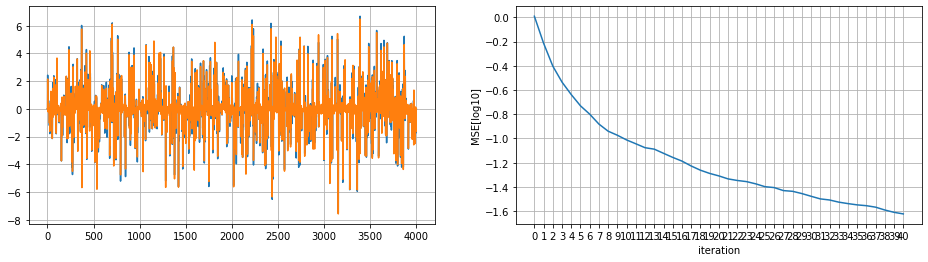

In [8]:
tmp1G.estimate(T=T)
tmp1G.result()

In [9]:
print("N(P-1): {}".format(N*(P-1)))
print("\n")
tmp2G.estimate(T=T, log=True)

N(P-1): 36000


Rp: 14789.0 	 F: 543 	 F\Rp: 3301
Total Communication Cost: 18090
Rp: 15746.0 	 F: 631 	 F\Rp: 3760
Total Communication Cost: 19506
Rp: 16204.0 	 F: 676 	 F\Rp: 3959
Total Communication Cost: 20163
Rp: 16537.0 	 F: 720 	 F\Rp: 4173
Total Communication Cost: 20710
Rp: 16852.0 	 F: 736 	 F\Rp: 4238
Total Communication Cost: 21090
Rp: 17080.0 	 F: 754 	 F\Rp: 4308
Total Communication Cost: 21388
Rp: 17408.0 	 F: 789 	 F\Rp: 4458
Total Communication Cost: 21866
Rp: 17696.0 	 F: 807 	 F\Rp: 4510
Total Communication Cost: 22206
Rp: 17947.0 	 F: 826 	 F\Rp: 4556
Total Communication Cost: 22503
Rp: 18197.0 	 F: 849 	 F\Rp: 4667
Total Communication Cost: 22864
Rp: 18497.0 	 F: 864 	 F\Rp: 4694
Total Communication Cost: 23191
Rp: 18933.0 	 F: 890 	 F\Rp: 4753
Total Communication Cost: 23686
Rp: 19248.0 	 F: 922 	 F\Rp: 4842
Total Communication Cost: 24090
Rp: 19674.0 	 F: 959 	 F\Rp: 4923
Total Communication Cost: 24597
Rp: 20040.0 	 F: 999 	 F\Rp: 5054
Total Communication Cost: 

final mse: 0.02713216953458188


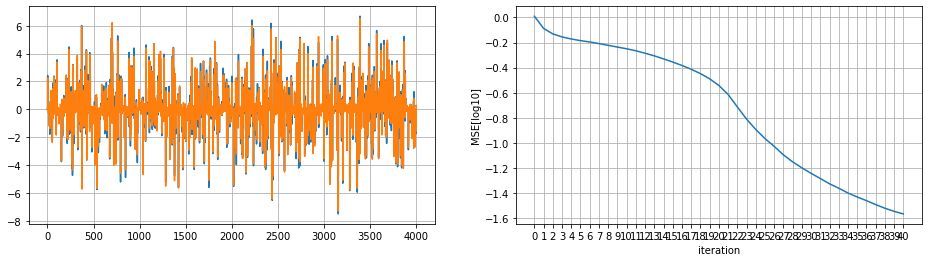

In [10]:
tmp2G.result()

final mse: 0.010130092345332103


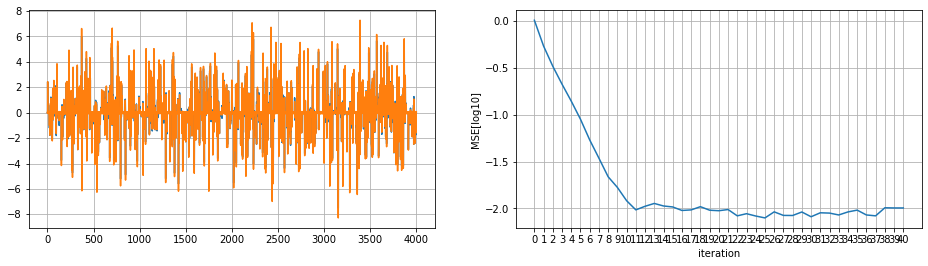

In [11]:
tmp3G.estimate(T=T)
tmp3G.result()

In [12]:
print("N(P-1): {}".format(N*(P-1)))
print("\n")
tmp4G.estimate(T=T, log=True)

N(P-1): 36000


Rp: 24129.0 	 F: 403 	 F\Rp: 1713
Total Communication Cost: 25842
Rp: 24156.0 	 F: 563 	 F\Rp: 2419
Total Communication Cost: 26575
Rp: 24341.0 	 F: 639 	 F\Rp: 2762
Total Communication Cost: 27103
Rp: 24403.0 	 F: 647 	 F\Rp: 2777
Total Communication Cost: 27180
Rp: 24570.0 	 F: 703 	 F\Rp: 2991
Total Communication Cost: 27561
Rp: 24765.0 	 F: 707 	 F\Rp: 2917
Total Communication Cost: 27682
Rp: 25002.0 	 F: 726 	 F\Rp: 2976
Total Communication Cost: 27978
Rp: 25319.0 	 F: 735 	 F\Rp: 3040
Total Communication Cost: 28359
Rp: 25410.0 	 F: 776 	 F\Rp: 3138
Total Communication Cost: 28548
Rp: 25647.0 	 F: 781 	 F\Rp: 3141
Total Communication Cost: 28788
Rp: 25926.0 	 F: 793 	 F\Rp: 3110
Total Communication Cost: 29036
Rp: 26037.0 	 F: 813 	 F\Rp: 3186
Total Communication Cost: 29223
Rp: 26337.0 	 F: 841 	 F\Rp: 3211
Total Communication Cost: 29548
Rp: 26515.0 	 F: 864 	 F\Rp: 3284
Total Communication Cost: 29799
Rp: 26680.0 	 F: 886 	 F\Rp: 3313
Total Communication Cost: 

final mse: 0.033874186767210726


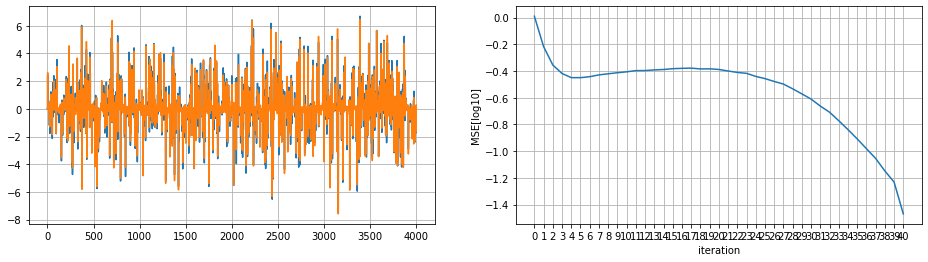

In [13]:
tmp4G.result()

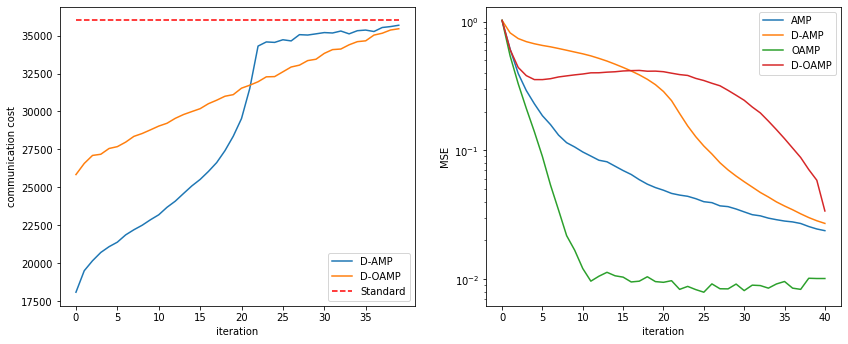

In [14]:
plt.figure(figsize=(14, 5.5))


t1 = np.arange(0, T, 1)

plt.subplot(121)
plt.xlabel('iteration')
plt.ylabel('communication cost')
plt.xticks(np.arange(0, T, 5))

standard = np.array([N * (P - 1) for _ in range(T)])

plt.plot(t1, tmp2G.communication_cost, label='D-AMP')
plt.plot(t1, tmp4G.communication_cost, label='D-OAMP')
plt.plot(t1, standard, ls='--', color='r', label='Standard')
plt.legend()


t2 = np.arange(0, T+1, 1)

plt.subplot(122)
plt.xlabel('iteration')
plt.ylabel('MSE')

plt.xticks(np.arange(0, T+1, 5))
plt.yscale('log')

plt.plot(t2, tmp1G.mse, label="AMP")
plt.plot(t2, tmp2G.mse, label="D-AMP")
plt.plot(t2, tmp3G.mse, label='OAMP')
plt.plot(t2, tmp4G.mse, label='D-OAMP')
plt.legend()

# ユニタリ不変行列での信号再構成

In [ ]:
tmp1U = AMP(UniInv.A, x, SNR)
tmp2U = D_AMP(UniInv.A, x, SNR, P)
tmp3U = OAMP(UniInv.A, x, SNR)
tmp4U = D_OAMP(UniInv.A, x, SNR, P)

final mse: 1.391496535673917e+78


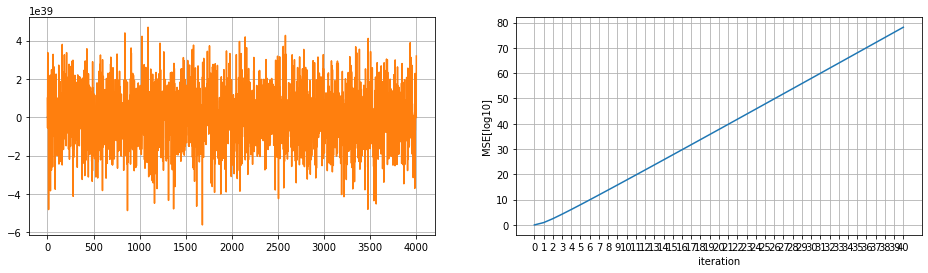

In [ ]:
tmp1U.estimate(T=T)
tmp1U.result()

In [ ]:
print("N(P-1): {}".format(N*(P-1)))
print("\n")
tmp2U.estimate(T=T, log=True)

N(P-1): 36000


Rp: 26494.0 	 F: 1587 	 F\Rp: 5609
Total Communication Cost: 32103
Rp: 25023.0 	 F: 1432 	 F\Rp: 5496
Total Communication Cost: 30519
Rp: 25720.0 	 F: 1529 	 F\Rp: 5630
Total Communication Cost: 31350
Rp: 25874.0 	 F: 1487 	 F\Rp: 5399
Total Communication Cost: 31273
Rp: 26006.0 	 F: 1517 	 F\Rp: 5505
Total Communication Cost: 31511
Rp: 26153.0 	 F: 1505 	 F\Rp: 5361
Total Communication Cost: 31514
Rp: 26237.0 	 F: 1491 	 F\Rp: 5313
Total Communication Cost: 31550
Rp: 26376.0 	 F: 1494 	 F\Rp: 5297
Total Communication Cost: 31673
Rp: 26485.0 	 F: 1480 	 F\Rp: 5190
Total Communication Cost: 31675
Rp: 26611.0 	 F: 1478 	 F\Rp: 5191
Total Communication Cost: 31802
Rp: 26684.0 	 F: 1476 	 F\Rp: 5180
Total Communication Cost: 31864
Rp: 26734.0 	 F: 1486 	 F\Rp: 5209
Total Communication Cost: 31943
Rp: 26768.0 	 F: 1516 	 F\Rp: 5295
Total Communication Cost: 32063
Rp: 26825.0 	 F: 1516 	 F\Rp: 5325
Total Communication Cost: 32150
Rp: 26885.0 	 F: 1509 	 F\Rp: 5298
Total Commu

final mse: 4.243843367935883e+63


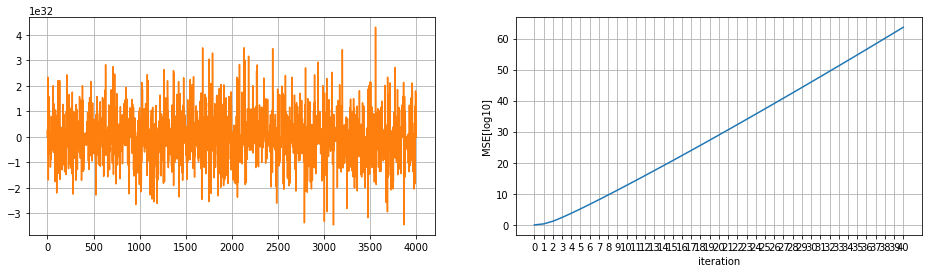

In [ ]:
tmp2U.result()

final mse: 0.007623655647798664


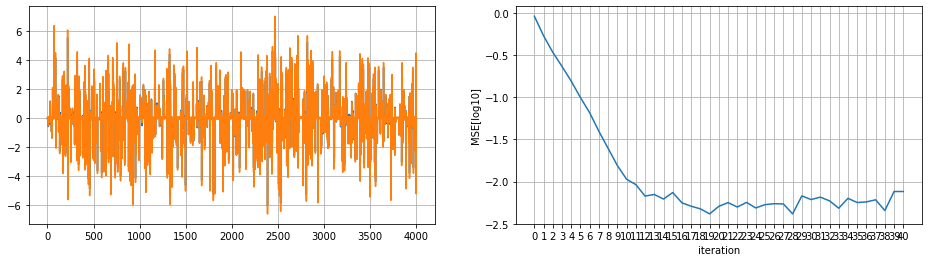

In [ ]:
tmp3U.estimate(T=T)
tmp3U.result()

In [ ]:
print("N(P-1): {}".format(N*(P-1)))
print("\n")
tmp4U.estimate(T=T, C=1.85, log=True)

N(P-1): 36000


Rp: 24579.0 	 F: 393 	 F\Rp: 1645
Total Communication Cost: 26224
Rp: 24670.0 	 F: 539 	 F\Rp: 2233
Total Communication Cost: 26903
Rp: 24914.0 	 F: 582 	 F\Rp: 2322
Total Communication Cost: 27236
Rp: 25084.0 	 F: 644 	 F\Rp: 2587
Total Communication Cost: 27671
Rp: 25177.0 	 F: 690 	 F\Rp: 2776
Total Communication Cost: 27953
Rp: 25497.0 	 F: 734 	 F\Rp: 2877
Total Communication Cost: 28374
Rp: 25768.0 	 F: 706 	 F\Rp: 2707
Total Communication Cost: 28475
Rp: 26021.0 	 F: 739 	 F\Rp: 2813
Total Communication Cost: 28834
Rp: 26076.0 	 F: 762 	 F\Rp: 2876
Total Communication Cost: 28952
Rp: 26371.0 	 F: 786 	 F\Rp: 2926
Total Communication Cost: 29297
Rp: 26327.0 	 F: 841 	 F\Rp: 3107
Total Communication Cost: 29434
Rp: 26737.0 	 F: 841 	 F\Rp: 3038
Total Communication Cost: 29775
Rp: 26706.0 	 F: 867 	 F\Rp: 3170
Total Communication Cost: 29876
Rp: 26970.0 	 F: 878 	 F\Rp: 3163
Total Communication Cost: 30133
Rp: 27185.0 	 F: 918 	 F\Rp: 3241
Total Communication Cost: 

final mse: 0.009830963342120962


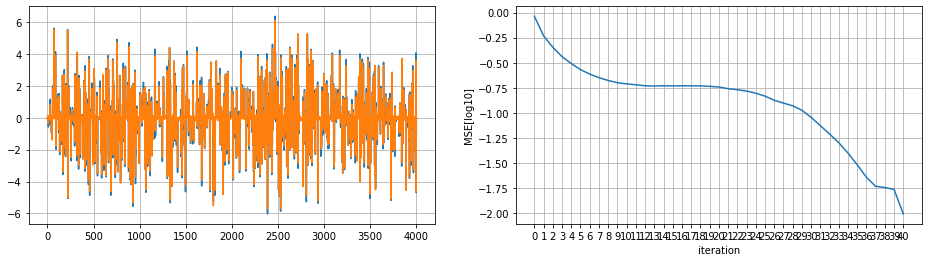

In [ ]:
tmp4U.result()

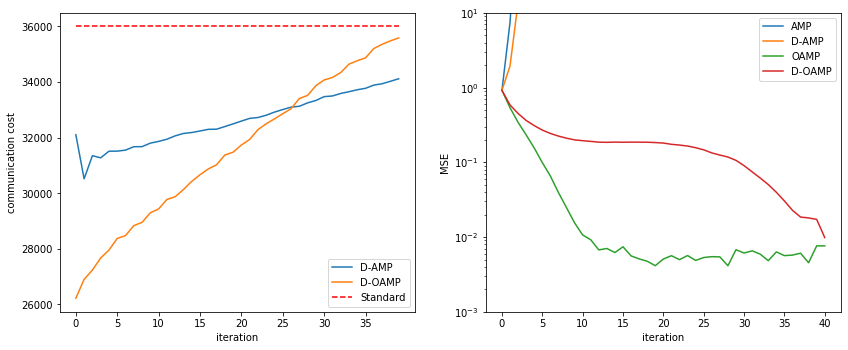

In [ ]:
plt.figure(figsize=(14, 5.5))


t1 = np.arange(0, T, 1)

plt.subplot(121)
plt.xlabel('iteration')
plt.ylabel('communication cost')
plt.xticks(np.arange(0, T, 5))

standard = np.array([N * (P - 1) for _ in range(T)])

plt.plot(t1, tmp2U.communication_cost, label='D-AMP')
plt.plot(t1, tmp4U.communication_cost, label='D-OAMP')
plt.plot(t1, standard, ls='--', color='r', label='Standard')
plt.legend()


t2 = np.arange(0, T+1, 1)

plt.subplot(122)
plt.xlabel('iteration')
plt.ylabel('MSE')

plt.xticks(np.arange(0, T+1, 5))
plt.ylim(1e-3, 1e+1)
plt.yscale('log')

plt.plot(t2, tmp1U.mse, label="AMP")
plt.plot(t2, tmp2U.mse, label="D-AMP")
plt.plot(t2, tmp3U.mse, label='OAMP')
plt.plot(t2, tmp4U.mse, label='D-OAMP')
plt.legend()